In [79]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy

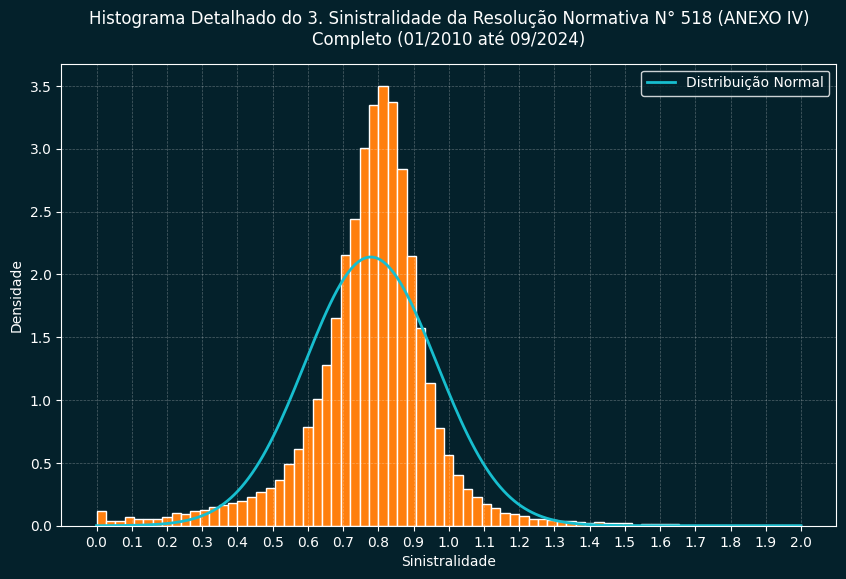


Quantidade de Sinistralidade base completa: 49199
CATEGORIA_SINISTRALIDADE
Dentro da Faixa (+0% até 200%)    43218
Missing (0%)                       5462
Outlier Superior (+200%)            363
Outlier Inferior (-0%)              156
Name: count. dtype: int64

Sinistralidade Média: 0.7787
Desvio Padrão: 0.1866
Mediana (Q2): 0.7936
Variância: 0.0348
Coeficiente de Variação (CV): 0.2396
Assimetria (Skewness): -0.1278
Curtose: 5.2473
Quartis: Q1 (25%): 0.7035 | Q2 (50%): 0.7936 |  Q3 (75%): 0.8683

Período Histórico de Análise: 01/2010 até 09/2024
Qtde. de Sinist. Analisadas: 43.218 Sinistralidades
Qtde. de Operadoras Analisadas: 1066



In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Carregar o CSV (padrão BR: ISO-8859-1, sep=';', decimal=',')
sinistralidade_completo = pd.read_csv('_base_histograma_sinistralidade - completo.csv', encoding='ISO-8859-1', sep=';', decimal=',')


# Seleciona apenas as colunas necessárias
df_sinistralidade_completo = sinistralidade_completo[['CD_OPERADORA', 'INICIO_TRIMESTRE', 'FIM_TRIMESTRE', 'SINISTRALIDADE', 'CATEGORIA_SINISTRALIDADE']].dropna()

# Converter para datetime (se ainda não for)
df_sinistralidade_completo['INICIO_TRIMESTRE'] = pd.to_datetime(df_sinistralidade_completo['INICIO_TRIMESTRE'], dayfirst=True, errors='coerce')
df_sinistralidade_completo['FIM_TRIMESTRE'] = pd.to_datetime(df_sinistralidade_completo['FIM_TRIMESTRE'], dayfirst=True, errors='coerce')


# Filtra os valores válidos entre 0 e 2 na coluna 'SINISTRALIDADE'
df_sinistralidade_completo = df_sinistralidade_completo[df_sinistralidade_completo['CATEGORIA_SINISTRALIDADE'] == 'Dentro da Faixa (+0% até 200%)']

df_sinistralidade_completo['SINISTRALIDADE'] = (
    df_sinistralidade_completo['SINISTRALIDADE']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

mu2 = df_sinistralidade_completo['SINISTRALIDADE'].mean()
sigma2 = df_sinistralidade_completo['SINISTRALIDADE'].std()

# 3. Parâmetros de cor
bg_color    = '#04212b'   # fundo escuro
bar_color   = '#ff7f0e'   # laranja vibrante
edge_color  = '#ffffff'   # borda branca
line_color  = '#17becf'   # ciano para a curva normal
text_color  = '#ffffff'   # rótulos em branco
grid_color  = '#ffffff'   # grade branca, mas baixa opacidade

# 4. Criar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6), facecolor=bg_color)
ax.set_facecolor(bg_color)

# 5. Histograma da coluna 'SINISTRALIDADE'
ax.hist(
    df_sinistralidade_completo['SINISTRALIDADE'],
    bins=75,
    range=(0, 2),
    density=True,
    color=bar_color,
    edgecolor=edge_color
)

# 6. Curva da Normal
x = np.linspace(0, 2, 200)
pdf = stats.norm.pdf(x, mu2, sigma2)
ax.plot(x, pdf, color=line_color, lw=2, label='Distribuição Normal')

# 7. Ajustes de rótulos, título e ticks
ax.set_title(
    "Histograma Detalhado do 3. Sinistralidade da Resolução Normativa N° 518 (ANEXO IV)\nCompleto (01/2010 até 09/2024)",
    pad=30,
    color=text_color,
    y=0.95
)
ax.set_xlabel("Sinistralidade", color=text_color)
ax.set_ylabel("Densidade", color=text_color)
ax.set_xticks(np.arange(0, 2.1, 0.10))
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)

# 8. Grade mais discreta
ax.grid(
    True,
    which='both',
    linestyle='--',
    linewidth=0.5,
    color=grid_color,
    alpha=0.3
)

# 9. Spines em branco
for spine in ax.spines.values():
    spine.set_color(text_color)

# 10. Legenda com fundo transparente
leg2 = ax.legend(frameon=True, facecolor=bg_color, edgecolor=edge_color, loc='upper right')
plt.setp(leg2.get_texts(), color=text_color)

# Caminho para salvar o gráfico
caminho_png = r"plot_histograma_sinistralidade - completo.png"

# Salva o gráfico antes de exibir
plt.savefig(caminho_png, dpi=300, bbox_inches='tight')

plt.show()

# Mediana Q2
mediana = df_sinistralidade_completo['SINISTRALIDADE'].median()

# variancia
variancia = df_sinistralidade_completo['SINISTRALIDADE'].var()

# Coeficiente de Variação (CV)
cv = (df_sinistralidade_completo['SINISTRALIDADE'].std() / df_sinistralidade_completo['SINISTRALIDADE'].mean())

# Assimetria (Skewness)
assimetria = df_sinistralidade_completo['SINISTRALIDADE'].skew()

# Curtose
curtose = df_sinistralidade_completo['SINISTRALIDADE'].kurt()

# Quartis
q1 = df_sinistralidade_completo['SINISTRALIDADE'].quantile(0.25)
q2 = df_sinistralidade_completo['SINISTRALIDADE'].quantile(0.50) 
q3 = df_sinistralidade_completo['SINISTRALIDADE'].quantile(0.75)

# Período Histórico de Análise
min_data2 = df_sinistralidade_completo['INICIO_TRIMESTRE'].min()
max_data2 = df_sinistralidade_completo['FIM_TRIMESTRE'].max()

# Qtde. de Sinist. Analisadas
qtde_sinist2 = len(df_sinistralidade_completo)

# Qtde. de Operadoras Analisadas
qtde_operadora2 = df_sinistralidade_completo['CD_OPERADORA'].nunique()



texto = (
    f"\nQuantidade de Sinistralidade base completa: {len(sinistralidade_completo)}"
    f"\n{sinistralidade_completo['CATEGORIA_SINISTRALIDADE'].value_counts()}\n"
    f"\nSinistralidade Média: {mu2:.4f}\n"
    f"Desvio Padrão: {sigma2:.4f}\n"
    f"Mediana (Q2): {mediana:.4f}\n"
    f"Variância: {variancia:.4f}\n"
    f"Coeficiente de Variação (CV): {cv:.4f}\n"
    f"Assimetria (Skewness): {assimetria:.4f}\n"
    f"Curtose: {curtose:.4f}\n"
    f"Quartis: Q1 (25%): {q1:.4f} | Q2 (50%): {q2:.4f} |  Q3 (75%): {q3:.4f}\n\n"
    f"Período Histórico de Análise: {min_data2.strftime('%m/%Y')} até {max_data2.strftime('%m/%Y')}\n"
    f"Qtde. de Sinist. Analisadas: {qtde_sinist2:,} Sinistralidades\n"
    f"Qtde. de Operadoras Analisadas: {qtde_operadora2}\n"
)

# Se quiser, substitui vírgula por ponto no número formatado (opcional, não recomendado no BR)
texto = texto.replace(",", ".")

print(texto)

In [124]:
with open("metricas_histograma_sinistralidade - completo.txt", "w", encoding="ISO-8859-1") as f:
    f.write(texto)
    print("Salvo!")

Salvo!
